## Diabetes prediction Model v-1.0

### SDG 3: Good Health and Well-Being

### Dataset 
**Imported from** - "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download"


### Importing the libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

### Imoprting the Dataset


In [3]:
dataset = pd.read_csv("diabetes.csv")
dataset.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

### Splitting the Datset 

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print("Train data size:", len(X_train))
print("Train label size:", len(y_test))
print("Test data size:", len(X_test))
print("Test label size:", len(y_test))


Train data size: 614
Train label size: 154
Test data size: 154
Test label size: 154


### Model training

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model


LogisticRegression()

### Prediciting the Test Data

In [9]:
y_pred = model.predict(X_test)

### Metrics

In [10]:
print(f"Validation Accuracy: {accuracy_score(y_test,y_pred) * 100:.2f}%")

Validation Accuracy: 75.32%


In [11]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



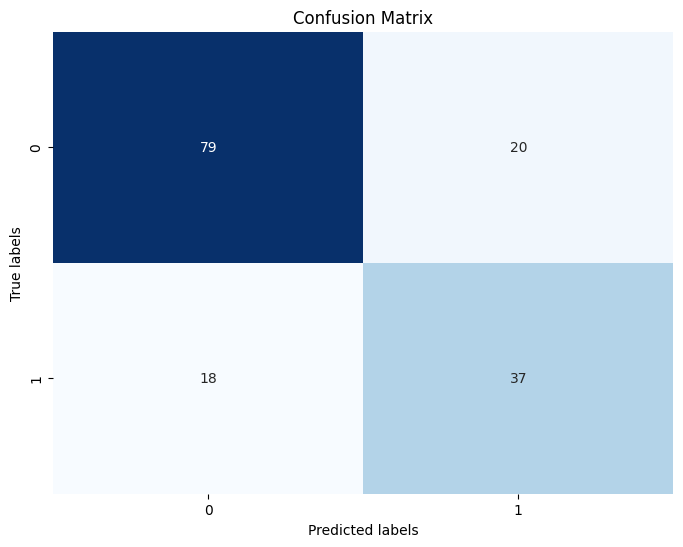

In [12]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


### Saving the Model 

In [13]:
import pickle

# Save the model
with open('Diabetes_model.pkl', 'wb') as file:
    pickle.dump(model, file)